In [90]:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


In [91]:
uber_drive_data = pd.read_csv('My Uber Drives - 2016.csv')
uber_drive_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [92]:
uber_drive_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [93]:
print(uber_drive_data.isnull().sum())
uber_drive_data = uber_drive_data.dropna()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [94]:
uber_drive_data.loc[:, 'START_DATE*'] = pd.to_datetime(uber_drive_data['START_DATE*'], format="%m/%d/%Y %H:%M", errors='coerce')
uber_drive_data.loc[:, 'END_DATE*'] = pd.to_datetime(uber_drive_data['END_DATE*'], format="%m/%d/%Y %H:%M", errors='coerce')
print(uber_drive_data['START_DATE*'].isna().sum())
uber_drive_data = uber_drive_data.dropna(subset=['START_DATE*'])

uber_drive_data.loc[:, 'HOUR'] = uber_drive_data['START_DATE*'].dt.hour
uber_drive_data.loc[:, 'DAY'] = uber_drive_data['START_DATE*'].dt.day
uber_drive_data.loc[:, 'MONTH'] = uber_drive_data['START_DATE*'].dt.month
uber_drive_data.loc[:, 'WEEKDAY'] = uber_drive_data['START_DATE*'].dt.day_name()
uber_drive_data.loc[:, 'DAY_OF_WEEK'] = uber_drive_data['START_DATE*'].dt.weekday


0


AttributeError: Can only use .dt accessor with datetimelike values

In [95]:
uber_drive_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


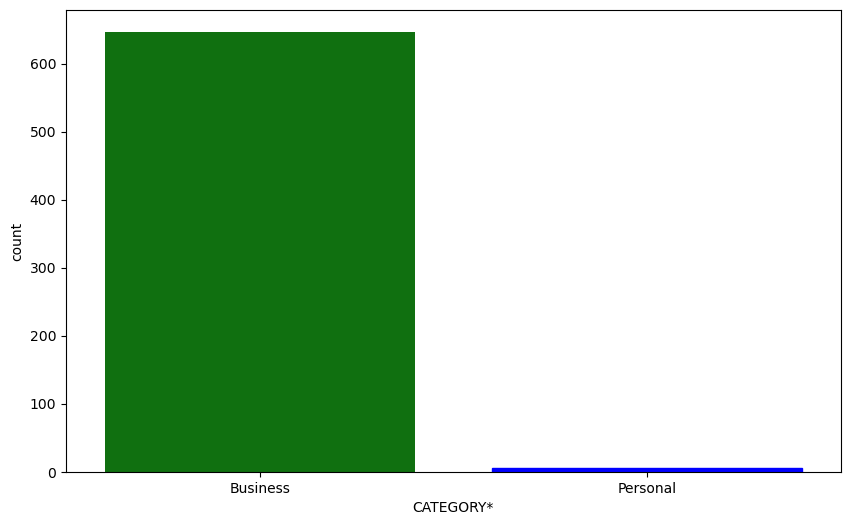

In [96]:
plt.figure(figsize=(10, 6))
axis = sns.countplot(x='CATEGORY*' ,data = uber_drive_data, color= 'green')
bars = axis.patches
bars[1].set_color('blue')

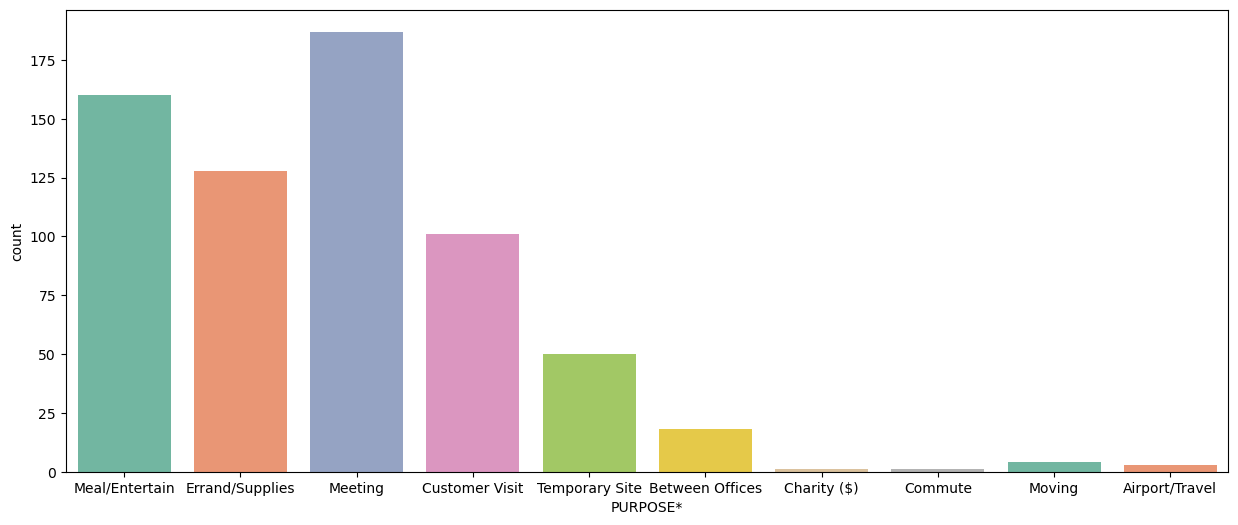

In [97]:
plt.figure(figsize=(15, 6))
axis = sns.countplot(x='PURPOSE*' ,data = uber_drive_data, color='blue',hue='PURPOSE*' ,palette = 'Set2',legend =False)
bars = axis.patches


<Axes: ylabel='Frequency'>

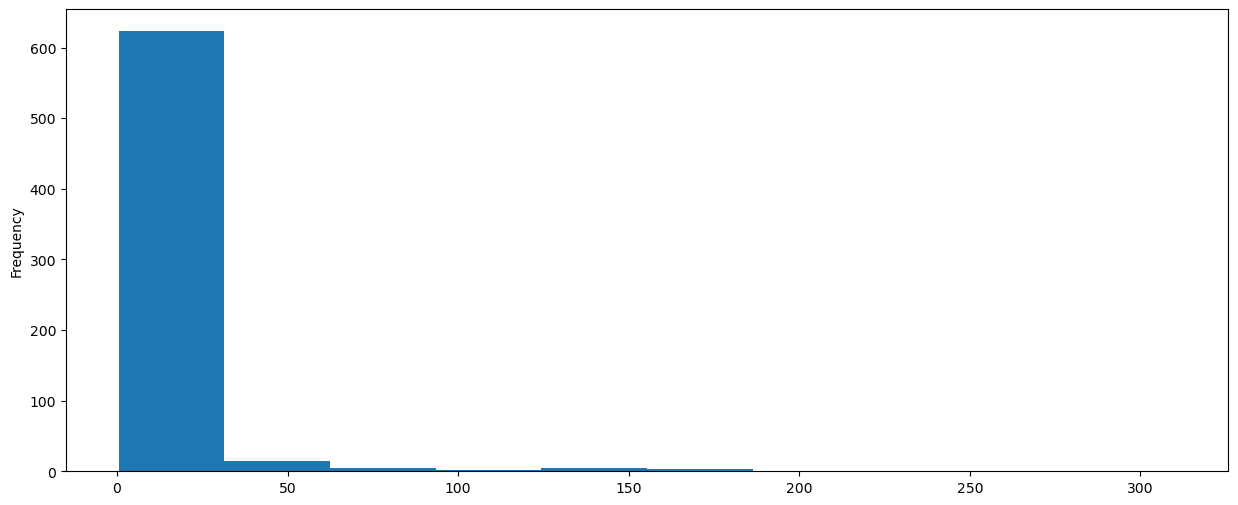

In [98]:
plt.figure(figsize=(15, 6))
uber_drive_data['MILES*'].plot.hist()

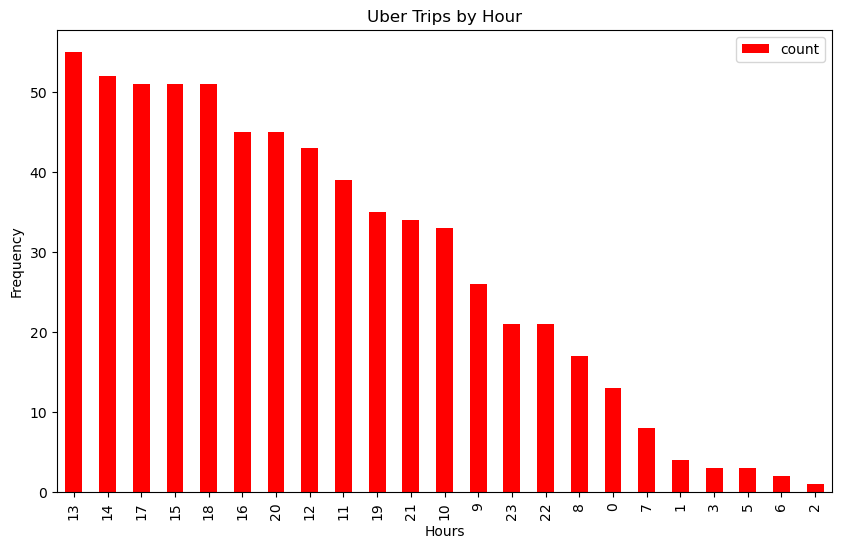

In [99]:
uber_drive_data['START_DATE*'] = pd.to_datetime(uber_drive_data['START_DATE*'], format="%m/%d/%Y %H:%M")
uber_drive_data['HOUR'] = uber_drive_data['START_DATE*'].dt.hour  
hours = uber_drive_data['HOUR'].value_counts()
hours.plot(kind='bar', color='red', figsize=(10,6),legend =True)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Uber Trips by Hour')
plt.show()


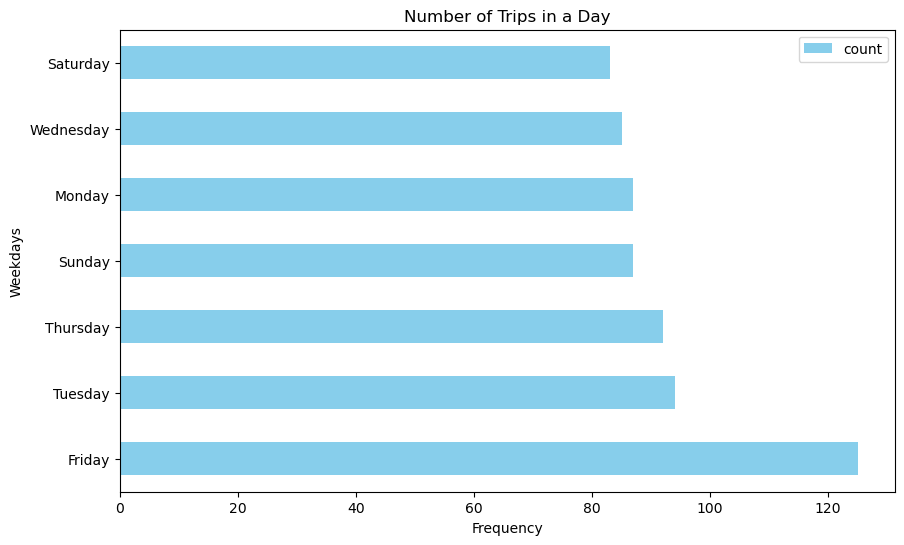

In [100]:
uber_drive_data['WEEKDAY'] = uber_drive_data['START_DATE*'].dt.day_name()
weekdays = uber_drive_data['WEEKDAY'].value_counts()
weekdays.plot(kind='barh', color='skyblue', figsize=(10,6),legend =True)
plt.xlabel('Frequency')
plt.ylabel('Weekdays')
plt.title('Number of Trips in a Day')
plt.show()

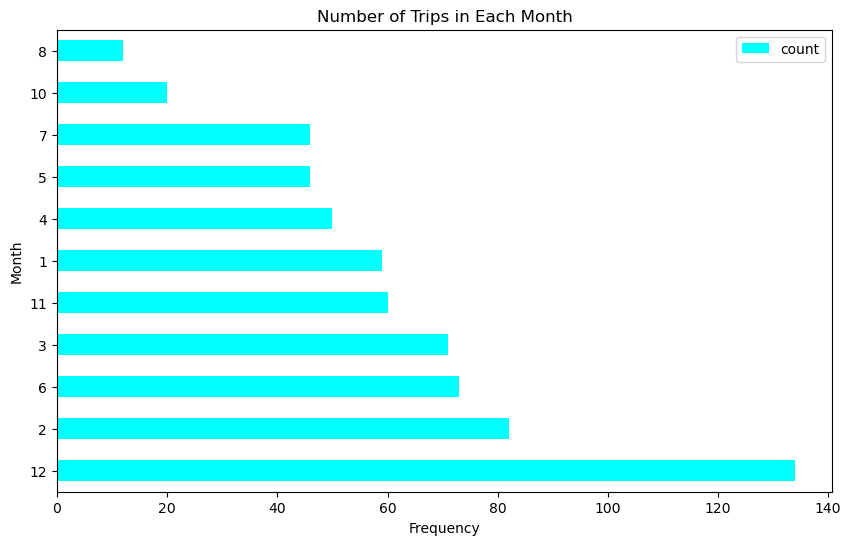

In [101]:
uber_drive_data['MONTH'] = uber_drive_data['START_DATE*'].dt.month
month = uber_drive_data['MONTH'].value_counts()
month.plot(kind='barh', color='cyan', figsize=(10,6),legend =True)
plt.xlabel('Frequency')
plt.ylabel('Month')
plt.title('Number of Trips in Each Month')
plt.show()

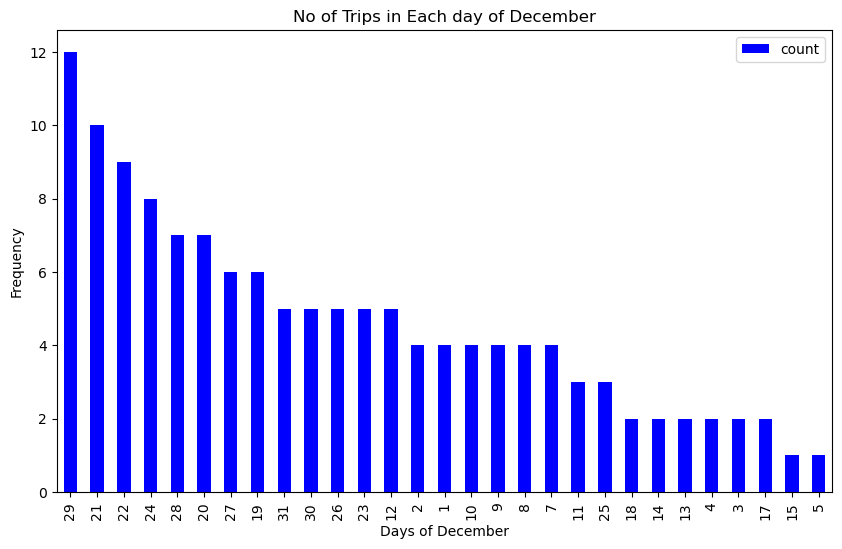

In [102]:
uber_drive_data['DAY'] = uber_drive_data['START_DATE*'].dt.day
month = uber_drive_data['DAY'][uber_drive_data['MONTH']==12].value_counts()
month.plot(kind='bar', color='blue', figsize=(10,6),legend =True)
plt.xlabel('Days of December')
plt.ylabel('Frequency')
plt.title('No of Trips in Each day of December')
plt.show()

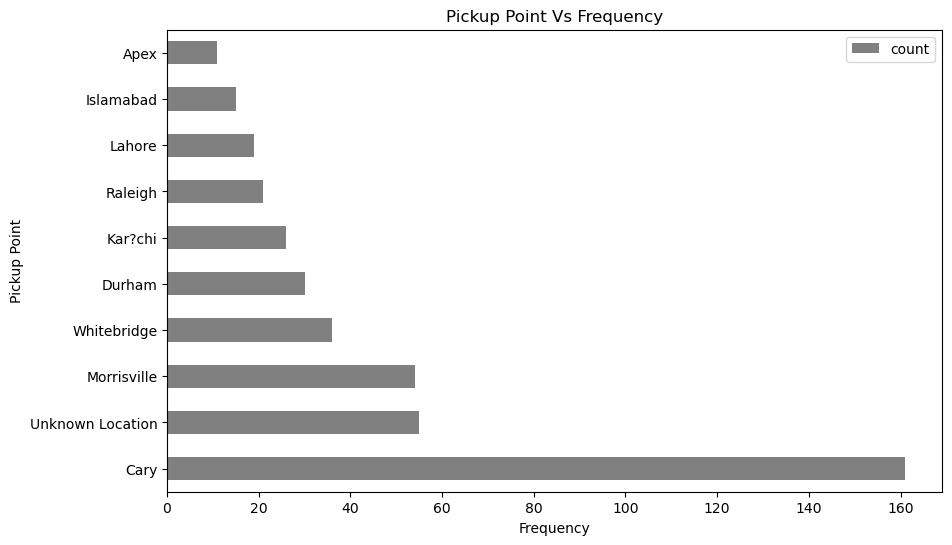

In [108]:
uber_drive_data['MONTH'] = uber_drive_data['START_DATE*'].dt.month
month = uber_drive_data['START*'].value_counts().nlargest(10)
month.plot(kind='barh', color='grey', figsize=(10,6),legend =True)
plt.xlabel('Frequency')
plt.ylabel('Pickup Point')
plt.title('Pickup Point Vs Frequency')
plt.show()

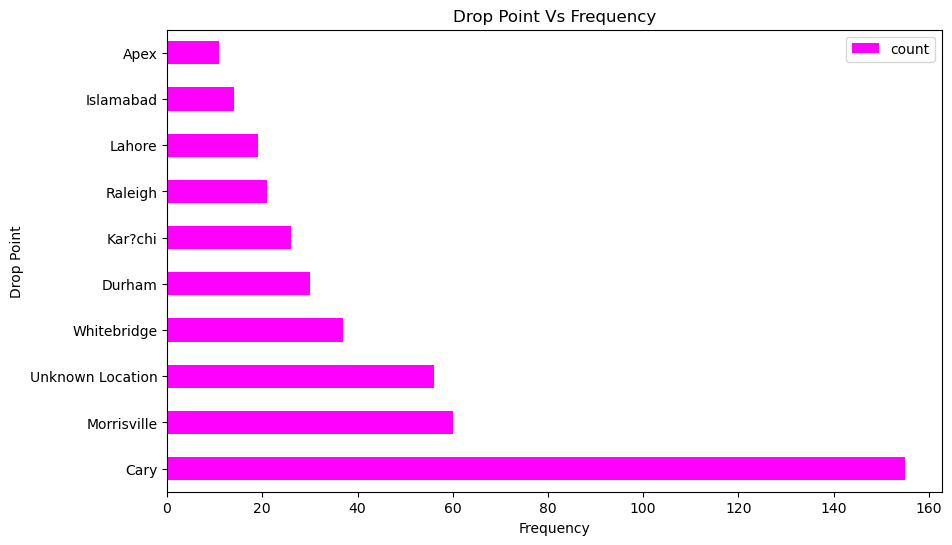

In [109]:
uber_drive_data['MONTH'] = uber_drive_data['START_DATE*'].dt.month
month = uber_drive_data['STOP*'].value_counts().nlargest(10)
month.plot(kind='barh', color='magenta', figsize=(10,6),legend =True)
plt.xlabel('Frequency')
plt.ylabel('Drop Point')
plt.title('Drop Point Vs Frequency')
plt.show()

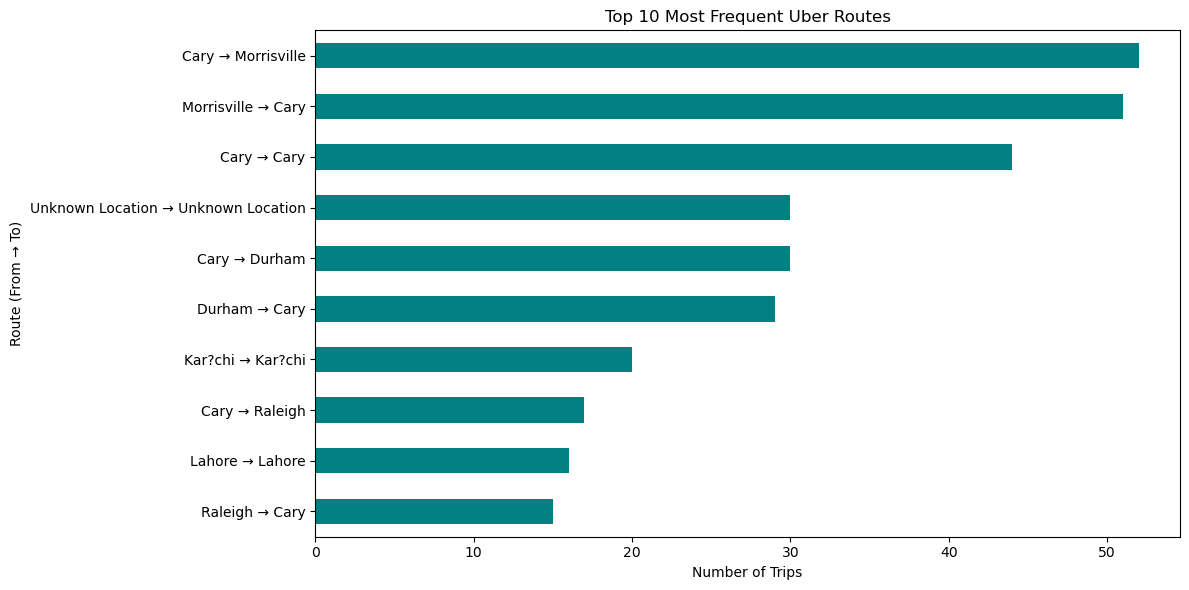

In [110]:

uber_drive_data['ROUTE'] = uber_drive_data['START*'] + " → " + uber_drive_data['STOP*']

route_counts = uber_drive_data['ROUTE'].value_counts().nlargest(10)

route_counts.plot(kind='barh', color='teal', figsize=(12,6))
plt.xlabel('Number of Trips')
plt.ylabel('Route (From → To)')
plt.title('Top 10 Most Frequent Uber Routes')
plt.gca().invert_yaxis()  # So the most frequent is at the top
plt.tight_layout()
plt.show()


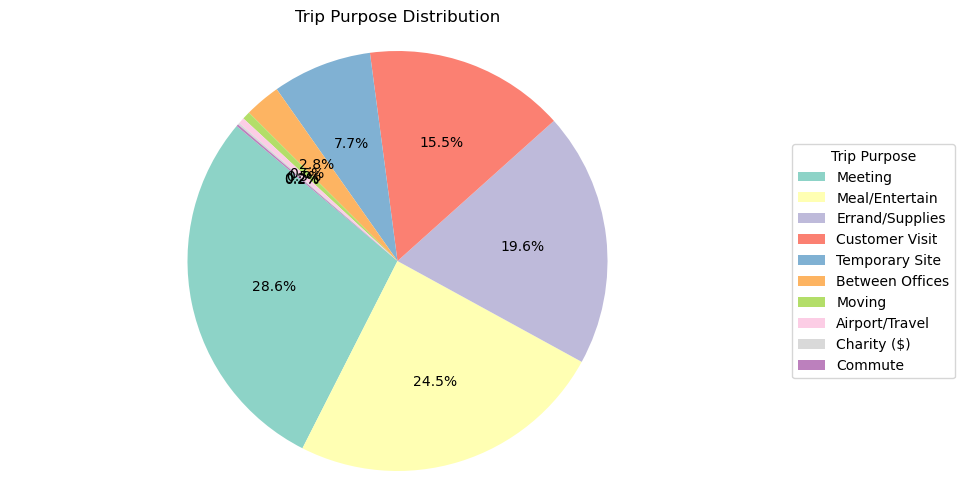

In [122]:
purpose_counts = uber_drive_data['PURPOSE*'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(purpose_counts, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.legend(wedges, purpose_counts.index, title='Trip Purpose', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trip Purpose Distribution')
plt.axis('equal')  
plt.show()